<a href="https://colab.research.google.com/github/Mahfuz-rahman2002/House-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

uploading the dataset

In [96]:
house_data = pd.read_csv('/content/drive/MyDrive/house price.csv')

In [97]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [98]:
house_data.drop(['statezip','city','street','date','country','yr_built','yr_renovated','condition'], axis=1, inplace=True)

In [99]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,1340,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,3370,280
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,1930,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,1000,1000
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,1140,800


In [100]:
correlation = house_data.corr()

<Axes: >

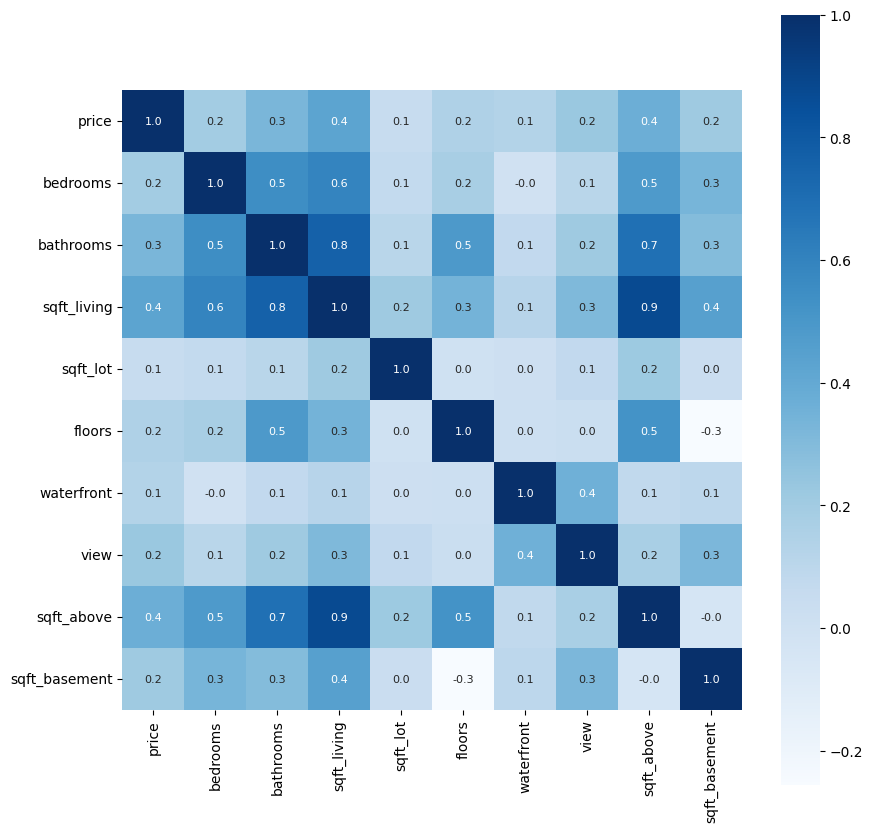

In [101]:
#construction a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

spliting the data

In [102]:
X=house_data.drop(columns='price',axis=1)
Y=house_data['price']

In [103]:
print(X)
print(Y)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50         1340      7912     1.5           0     0   
1          5.0       2.50         3650      9050     2.0           0     4   
2          3.0       2.00         1930     11947     1.0           0     0   
3          3.0       2.25         2000      8030     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75         1510      6360     1.0           0     0   
4596       3.0       2.50         1460      7573     2.0           0     0   
4597       3.0       2.50         3010      7014     2.0           0     0   
4598       4.0       2.00         2090      6630     1.0           0     0   
4599       3.0       2.50         1490      8102     2.0           0     0   

      sqft_above  sqft_basement  
0           1340             

train and testing the data

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [105]:
print(X.shape, X_train.shape, X_test.shape)

(4600, 9) (3680, 9) (920, 9)


Model training with logistic regression

In [106]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
# R squared error for training data
from sklearn.metrics import r2_score
X_train_prediction = model.predict(X_train)
score_1 = r2_score(Y_train, X_train_prediction)

print("R squared error for training data : ", score_1)

# prediction on test data
test_data_prediction = model.predict(X_test)

# R squared error for test data
score_2 = r2_score(Y_test, test_data_prediction)

print("R squared error for test data : ", score_2)

R squared error for training data :  0.9441359412098062
R squared error for test data :  0.008458505135922056


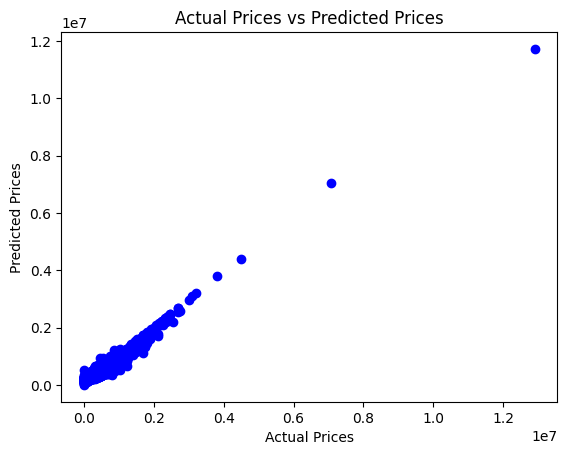

In [109]:
plt.scatter(Y_train, X_train_prediction, color='blue')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()